## ライブラリのインポート

In [17]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE

## Word2Vecモデルの学習

In [18]:
# Word2Vecモデルの学習
model = Word2Vec(
    sentences=LineSentence("../data/processed/corpus-true.txt"),  # 学習データ
    vector_size=100,  # ベクトルの次元数
    window=5,  # コンテキストウィンドウのサイズ
    min_count=2,  # 最小出現回数（これ以下の単語は無視）
    sg=1,  # 0: CBOW, 1: Skip-gram
    epochs=100,  # エポック数
    negative=5,  # ネガティブサンプリング数（Skip-gram使用時）
    alpha=0.025,  # 初期学習率
    min_alpha=0.0001,  # 最小学習率
    seed=42,  # 再現性のため
)

print(f"語彙数: {len(model.wv):,}語")
print(f"ベクトルの次元数: {model.wv.vector_size}")
print("学習完了")

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


語彙数: 193語
ベクトルの次元数: 100
学習完了


## モデルの保存

In [19]:
# モデルの保存
model.save("../models/word2vec_true_model.bin")
print("モデルを保存しました: ../models/word2vec_true_model.bin")

# 単語ベクトルのみを保存（より軽量）
model.wv.save("../models/word2vec_true_vectors.kv")
print("単語ベクトルを保存しました: ../models/word2vec_true_vectors.kv")

モデルを保存しました: ../models/word2vec_true_model.bin
単語ベクトルを保存しました: ../models/word2vec_true_vectors.kv


## 単語ベクトルの確認

In [20]:
# 単語ベクトルの確認
test_words = ["開発", "システム", "AWS", "React", "Python", "設計", "テスト"]

print("単語ベクトルの確認:")
for word in test_words:
    if word in model.wv:
        vector = model.wv[word]
        print(f"\n単語: {word}")
        print(f"  ベクトル (最初の10次元): {vector[:10]}")
        print(f"  ベクトルの形状: {vector.shape}")
    else:
        print(f"\n単語 '{word}' は語彙に含まれていません")

単語ベクトルの確認:

単語: 開発
  ベクトル (最初の10次元): [-0.45018706 -0.36112764 -0.07371954 -0.0127276   0.06697258  0.24108648
 -0.23806313  0.35741392 -0.656309   -0.100191  ]
  ベクトルの形状: (100,)

単語: システム
  ベクトル (最初の10次元): [ 0.31906816  0.07123149  0.27124062  0.3967396   0.09323621  0.22222708
 -0.16134764  0.18728139 -0.27458915  0.16953182]
  ベクトルの形状: (100,)

単語: AWS
  ベクトル (最初の10次元): [ 0.04965738  0.2026209  -0.5051281  -0.1752011  -0.02184215  0.24217626
 -0.45482796 -0.07400909 -0.45586106  0.23586044]
  ベクトルの形状: (100,)

単語: React
  ベクトル (最初の10次元): [-0.317304   -0.5175331  -0.06762932 -0.44563338  0.02197311  0.23673533
  0.19602013  0.06841426 -0.42116225  0.5435266 ]
  ベクトルの形状: (100,)

単語 'Python' は語彙に含まれていません

単語: 設計
  ベクトル (最初の10次元): [ 0.13331497  0.05876507  0.07823399 -0.21586233 -0.10399862  0.07614454
 -0.05719302  0.57910043 -0.21270865  0.1772756 ]
  ベクトルの形状: (100,)

単語: テスト
  ベクトル (最初の10次元): [-0.04802029  0.01338423 -0.07801463  0.07473268 -0.00173344  0.05535309
 -0.20820965  0.175146

## 類似単語の検索

In [21]:
# 類似単語の検索
test_words = ["AWS", "React", "リーダー", "開発", "テスト"]

for test_word in test_words:
    if test_word in model.wv:
        similar_words = model.wv.most_similar(test_word, topn=10)
        print(f"\n'{test_word}' に類似する単語:")
        for word, similarity in similar_words:
            print(f"  {word}: {similarity:.4f}")
    else:
        print(f"\n単語 '{test_word}' は語彙に含まれていません")


'AWS' に類似する単語:
  主導: 0.6090
  オンプレミス: 0.6010
  環境: 0.5333
  パイプライン: 0.4444
  マスター: 0.4373
  経験: 0.4358
  課題: 0.4337
  新技術: 0.4324
  ユーザビリティテスト: 0.4309
  設定: 0.4295

'React' に類似する単語:
  SPA: 0.6358
  Vue: 0.5898
  アジャイル: 0.4613
  環境: 0.4420
  チームメンバー: 0.4383
  コードレビュー: 0.4373
  フロントエンド: 0.4360
  ユーザビリティテスト: 0.4316
  スプリント: 0.4287
  手法: 0.4191

'リーダー' に類似する単語:
  テスター: 0.7096
  PM: 0.6671
  システムエンジニア: 0.6631
  SWE: 0.6577
  プログラマー: 0.6572
  SE: 0.6078
  PG: 0.5992
  デザイナー: 0.5793
  インフラエンジニア: 0.5772
  QA: 0.5448

'開発' に類似する単語:
  レビュー: 0.4283
  動画配信サービス: 0.3752
  要件定義: 0.3730
  リニューアル: 0.3330
  ECサイト: 0.3119
  基盤: 0.2886
  構築: 0.2876
  技術: 0.2860
  データ分析: 0.2849
  設計: 0.2807

'テスト' に類似する単語:
  要件定義: 0.4717
  UI: 0.4587
  UX: 0.4340
  保守: 0.3923
  リファクタリング: 0.3666
  データ分析: 0.3411
  レビュー: 0.3117
  設計: 0.3115
  移行: 0.3098
  自動: 0.3022


## 単語間の類似度計算

In [22]:
# 単語間の類似度を計算
word_pairs = [
    ("AWS", "GCP"),
    ("React", "Vue"),
    ("開発", "構築"),
    ("設計", "実装"),
    ("プログラミング", "開発"),
    ("テスト", "デバッグ"),
]

print("単語間の類似度:")
for word1, word2 in word_pairs:
    if word1 in model.wv and word2 in model.wv:
        similarity = model.wv.similarity(word1, word2)
        print(f"  {word1} - {word2}: {similarity:.4f}")
    else:
        missing = []
        if word1 not in model.wv:
            missing.append(word1)
        if word2 not in model.wv:
            missing.append(word2)
        print(f"  {word1} - {word2}: 語彙に含まれていない単語: {', '.join(missing)}")

単語間の類似度:
  AWS - GCP: 語彙に含まれていない単語: GCP
  React - Vue: 0.5898
  開発 - 構築: 0.2876
  設計 - 実装: 0.4372
  プログラミング - 開発: 0.1978
  テスト - デバッグ: 0.1064


## 単語ベクトルをCSVに保存

In [23]:
# 全単語のベクトルをDataFrameに変換して保存
word_vectors_df = pd.DataFrame(
    [model.wv[word] for word in model.wv.index_to_key], index=model.wv.index_to_key
)

# CSVに保存
word_vectors_df.to_csv("../outputs/word_vectors_true.csv")
print("単語ベクトルをCSVに保存しました: ../outputs/word_vectors_true.csv")
print(f"形状: {word_vectors_df.shape}")
print("\n最初の5単語:")
print(word_vectors_df.head())

単語ベクトルをCSVに保存しました: ../outputs/word_vectors_true.csv
形状: (193, 100)

最初の5単語:
              0         1         2         3         4         5         6   \
開発     -0.450187 -0.361128 -0.073720 -0.012728  0.066973  0.241086 -0.238063   
構築     -0.174872 -0.350017  0.250364 -0.280459  0.018087  0.072188  0.189094   
設計      0.133315  0.058765  0.078234 -0.215862 -0.103999  0.076145 -0.057193   
プロジェクト  0.048197 -0.409408 -0.257277 -0.042102  0.123633  0.148811 -0.273008   
テスト    -0.048020  0.013384 -0.078015  0.074733 -0.001733  0.055353 -0.208210   

              7         8         9   ...        90        91        92  \
開発      0.357414 -0.656309 -0.100191  ... -0.139206  0.213510  0.099854   
構築      0.339011 -0.271659  0.138397  ... -0.080513  0.397156  0.045598   
設計      0.579100 -0.212709  0.177276  ... -0.144073  0.139985  0.225941   
プロジェクト  0.333782 -0.357834  0.101493  ...  0.104709 -0.006323 -0.051076   
テスト     0.175146 -0.115927  0.023201  ... -0.095137  0.169343  0.104

## t-SNEによる単語ベクトルの可視化

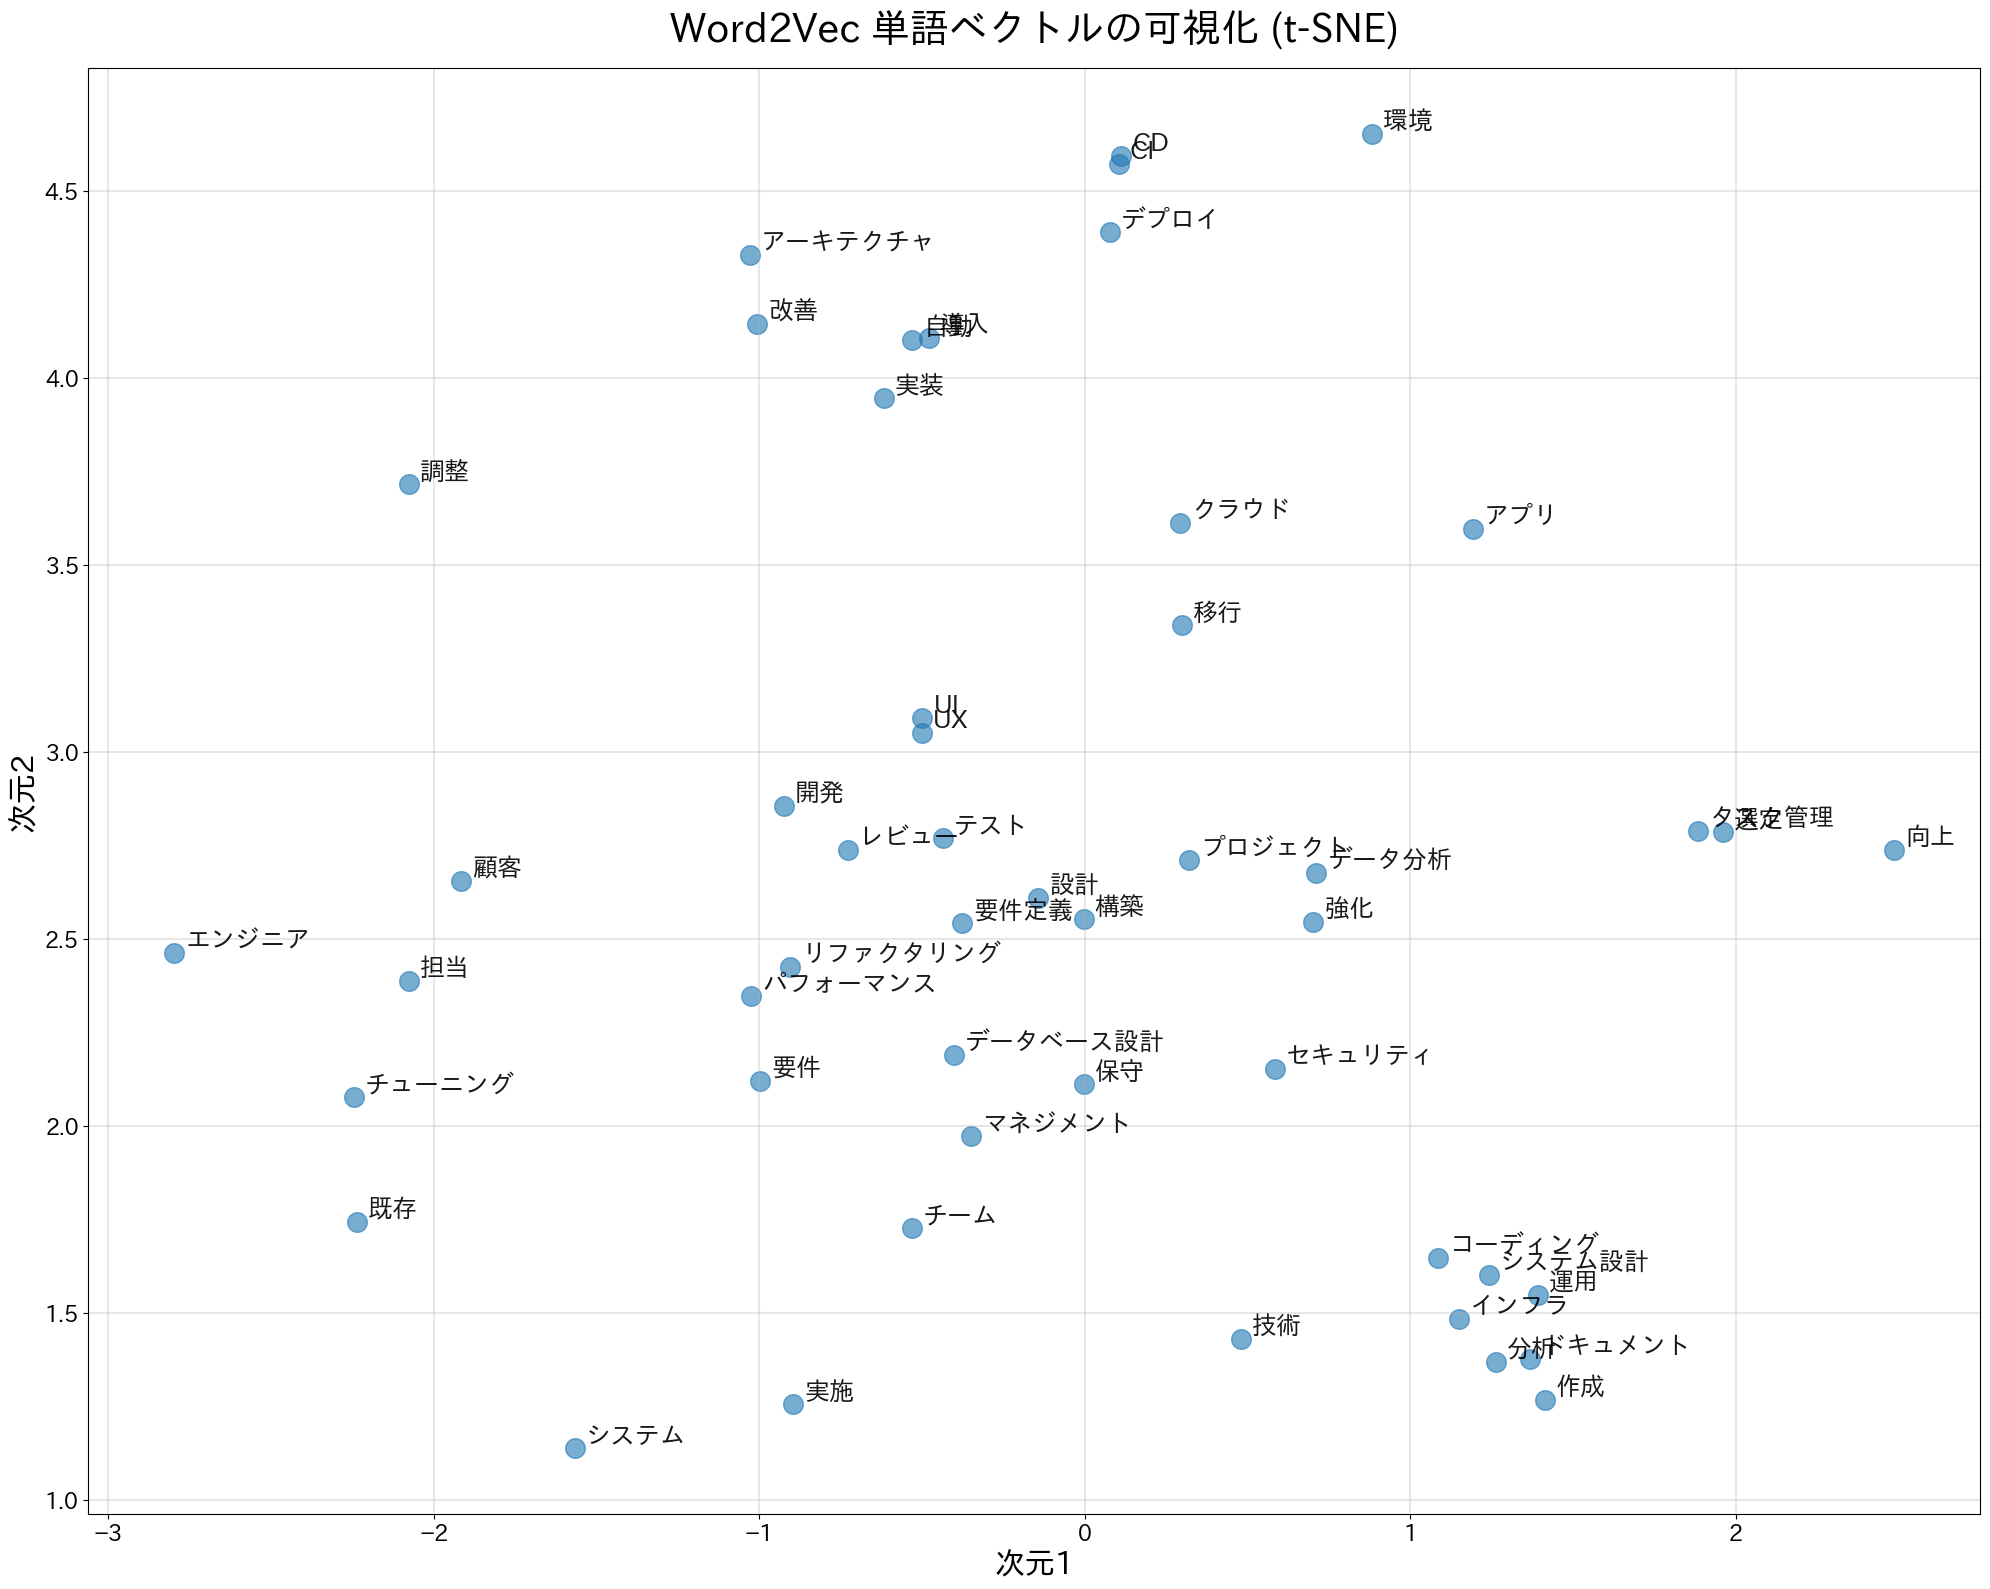

可視化した単語数: 50


In [24]:
# 全単語の頻度を集計
corpus = LineSentence("../data/processed/corpus-true.txt")
word_freq = Counter()
for doc in corpus:
    word_freq.update(doc)

# 頻出単語上位50件を可視化
top_words = [word for word, _ in word_freq.most_common(50)]
top_words_in_model = [word for word in top_words if word in model.wv]

# ベクトルを取得
vectors = np.array([model.wv[word] for word in top_words_in_model])

# t-SNEで2次元に圧縮
tsne = TSNE(
    n_components=2, random_state=42, perplexity=min(30, len(top_words_in_model) - 1)
)
vectors_2d = tsne.fit_transform(vectors)

# フォント設定
plt.rcParams["font.family"] = "IPAexGothic"

# 可視化
plt.figure(figsize=(20, 16))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.6, s=200)

# 単語ラベルを追加
for i, word in enumerate(top_words_in_model):
    plt.annotate(
        word,
        xy=(vectors_2d[i, 0], vectors_2d[i, 1]),
        xytext=(8, 4),
        textcoords="offset points",
        fontsize=18,
        fontweight="bold",
        alpha=0.9,
    )

plt.title(
    "Word2Vec 単語ベクトルの可視化 (t-SNE)", fontsize=28, fontweight="bold", pad=20
)
plt.xlabel("次元1", fontsize=22, fontweight="bold")
plt.ylabel("次元2", fontsize=22, fontweight="bold")
plt.tick_params(labelsize=16)
plt.grid(True, alpha=0.3, linewidth=1.5)
plt.tight_layout()
plt.show()

print(f"可視化した単語数: {len(top_words_in_model)}")